In [127]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '../../Modules/Preprocessing'))

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import truncnorm
from ConvertModules import address_convert as ac, others_convert as oc, number_convert as nc

In [128]:
with open("../../Data/RawData/NhaO_raw-dataset.json", "r", encoding="utf-8") as house_file:
    data = json.load(house_file)
    df_raw = pd.json_normalize(data)
    df_raw.drop_duplicates(inplace=True, ignore_index=True)

# Khám phá dữ liệu

In [129]:
df_raw.shape

(45925, 16)

Bộ dataset nhà đất Việt Nam:
* Tổng cộng có 45925 dòng
* Với 16 cột

In [130]:
df_raw.columns

Index(['DienTich', 'DiaChi', 'City', 'District', 'MucGia', 'Lat', 'Long',
       'MatTien', 'PhapLy', 'DuongVao', 'HuongNha', 'SoTang', 'SoPhongNgu',
       'SoToilet', 'NoiThat', 'HuongBanCong'],
      dtype='object')

Bao gồm các cột đặc trưng: DienTich, DiaChi, City, District, MucGia, Lat, Long, MatTien, PhapLy, DuongVao, HuongNha, SoTang, SoPhongNgu, SoToilet, NoiThat, HuongBanCong

In [131]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45925 entries, 0 to 45924
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DienTich      45923 non-null  object 
 1   DiaChi        45924 non-null  object 
 2   City          45924 non-null  object 
 3   District      45924 non-null  object 
 4   MucGia        45924 non-null  object 
 5   Lat           45221 non-null  float64
 6   Long          45221 non-null  float64
 7   MatTien       28517 non-null  object 
 8   PhapLy        37476 non-null  object 
 9   DuongVao      22016 non-null  object 
 10  HuongNha      11758 non-null  object 
 11  SoTang        38800 non-null  object 
 12  SoPhongNgu    31188 non-null  object 
 13  SoToilet      28594 non-null  object 
 14  NoiThat       25526 non-null  object 
 15  HuongBanCong  6937 non-null   object 
dtypes: float64(2), object(14)
memory usage: 5.6+ MB


Kiểu dữ liệu của các trường:
* Đa số kiểu dữ liệu là: object => cần phải biến đổi để có kiểu dữ liệu phù hợp hơn
* Lat, Long: có kiểu dữ liệu float64

## Số hóa dữ liệu

In [132]:
ac.address_convert_all(df_raw)
oc.direction_convert_all(df_raw,'HuongNha')
oc.direction_convert_all(df_raw,'HuongBanCong')
oc.furnishment_convert_all(df_raw)
oc.legalty_convert_all(df_raw)
nc.numbers_convert(df_raw)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45925 entries, 0 to 45924
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DienTich      45923 non-null  float64
 1   DiaChi        45924 non-null  object 
 2   City          45924 non-null  Int32  
 3   District      45903 non-null  Int32  
 4   MucGia        41268 non-null  float64
 5   Lat           45221 non-null  float64
 6   Long          45221 non-null  float64
 7   MatTien       28517 non-null  float64
 8   PhapLy        37476 non-null  Int8   
 9   DuongVao      22016 non-null  float64
 10  HuongNha      11758 non-null  Int8   
 11  SoTang        38800 non-null  float64
 12  SoPhongNgu    31188 non-null  float64
 13  SoToilet      28594 non-null  float64
 14  NoiThat       25526 non-null  Int8   
 15  HuongBanCong  6937 non-null   Int8   
 16  Ward          45231 non-null  Int32  
dtypes: Int32(3), Int8(4), float64(9), object(1)
memory usage: 4.5+ MB


Bộ dữ liệu có nhiều giá trị Null cần được xử lý

In [133]:
df_raw.describe()

,DienTich,City,District,MucGia,Lat,Long,MatTien,PhapLy,DuongVao,HuongNha,SoTang,SoPhongNgu,SoToilet,NoiThat,HuongBanCong,Ward
count,45923.000000,45924.0,45903.0,4.126800e+04,45221.000000,45221.000000,28517.000000,37476.0,22016.000000,11758.0,38800.000000,31188.000000,28594.000000,25526.0,6937.0,45231.0
mean,137.687310,42.309729,431.210749,2.743651e+10,15.799766,106.429344,7.060081,1.132511,12.153749,4.990049,4.097474,5.454341,5.266664,2.001175,4.996829,15497.968937
std,283.889755,36.542706,342.711112,1.886207e+11,4.961489,0.741593,5.786653,0.604629,13.219918,2.110574,1.923492,7.486922,7.276118,0.785021,2.102476,12149.351462
min,0.280000,1.0,1.0,2.260000e+03,9.033437,103.828524,1.000000,0.0,1.000000,1.0,1.000000,1.000000,1.000000,0.0,1.0,1.0
25%,55.000000,1.0,9.0,6.200000e+09,10.797861,105.822709,4.200000,1.0,5.000000,3.0,3.000000,3.000000,3.000000,2.0,3.0,343.0
50%,82.500000,48.0,494.0,1.180000e+10,16.020662,106.625522,5.000000,1.0,8.000000,6.0,4.000000,4.000000,4.000000,2.0,6.0,20314.0
75%,140.000000,79.0,766.0,2.500000e+10,21.009847,106.701921,8.000000,1.0,15.000000,7.0,5.000000,5.000000,5.000000,2.0,6.0,26971.0
max,17000.000000,96.0,968.0,3.200000e+13,22.834602,111.203641,265.000000,4.0,800.000000,8.0,27.000000,255.000000,255.000000,3.0,8.0,32098.0


Trong dataset

DienTich
* Trung bình: 137.687m
* Nhỏ nhất: 0.28m
* Lớn nhất: 17000m

MucGia
* Trung bình: 27436510000 VND
* Thấp nhất: 2260 VND
* Cao nhất: 32000000000000 VND

MatTien
* Trung bình: 7.06m
* Thấp nhất: 1m
* Cao nhất: 265m

DuongVao
* Trung bình: 12.15m
* Giá trị thấp nhất: 1m
* Giá trị cao nhất: 800m

SoTang
* Trung bình: 4 tầng
* Thấp nhất: 1
* Cao nhất: 27 tầng

SoPhongNgu
* trung bình: 5 - 6 phòng
* Thấp nhất: 1
* Nhiều nhất: 255 tầng

SoToilet
* Trung bình: khoảng 5
* Thấp nhất: 1
* Cao nhất: 255

=> Ở các đặc trưng: có nhiều giá trị Min Max bất thường

In [134]:
# drop cột không cần thiết và dư thừa cho mô hình huấn luyện
df_raw = df_raw.drop(columns=['Lat', 'Long', 'DiaChi'])
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45925 entries, 0 to 45924
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DienTich      45923 non-null  float64
 1   City          45924 non-null  Int32  
 2   District      45903 non-null  Int32  
 3   MucGia        41268 non-null  float64
 4   MatTien       28517 non-null  float64
 5   PhapLy        37476 non-null  Int8   
 6   DuongVao      22016 non-null  float64
 7   HuongNha      11758 non-null  Int8   
 8   SoTang        38800 non-null  float64
 9   SoPhongNgu    31188 non-null  float64
 10  SoToilet      28594 non-null  float64
 11  NoiThat       25526 non-null  Int8   
 12  HuongBanCong  6937 non-null   Int8   
 13  Ward          45231 non-null  Int32  
dtypes: Int32(3), Int8(4), float64(7)
memory usage: 3.5 MB


Xóa các cột không cần thiết ra khỏi mô hình:
* Lat,Long được sử dụng cho việc thiết kế web nên tạm xóa ra khỏi mô hình
* DiaChi đã được tách ra thành các trường City, District, Ward. Nên xóa trường này ra khỏi mô hình

## Xử lý ngoại lệ (outlier)

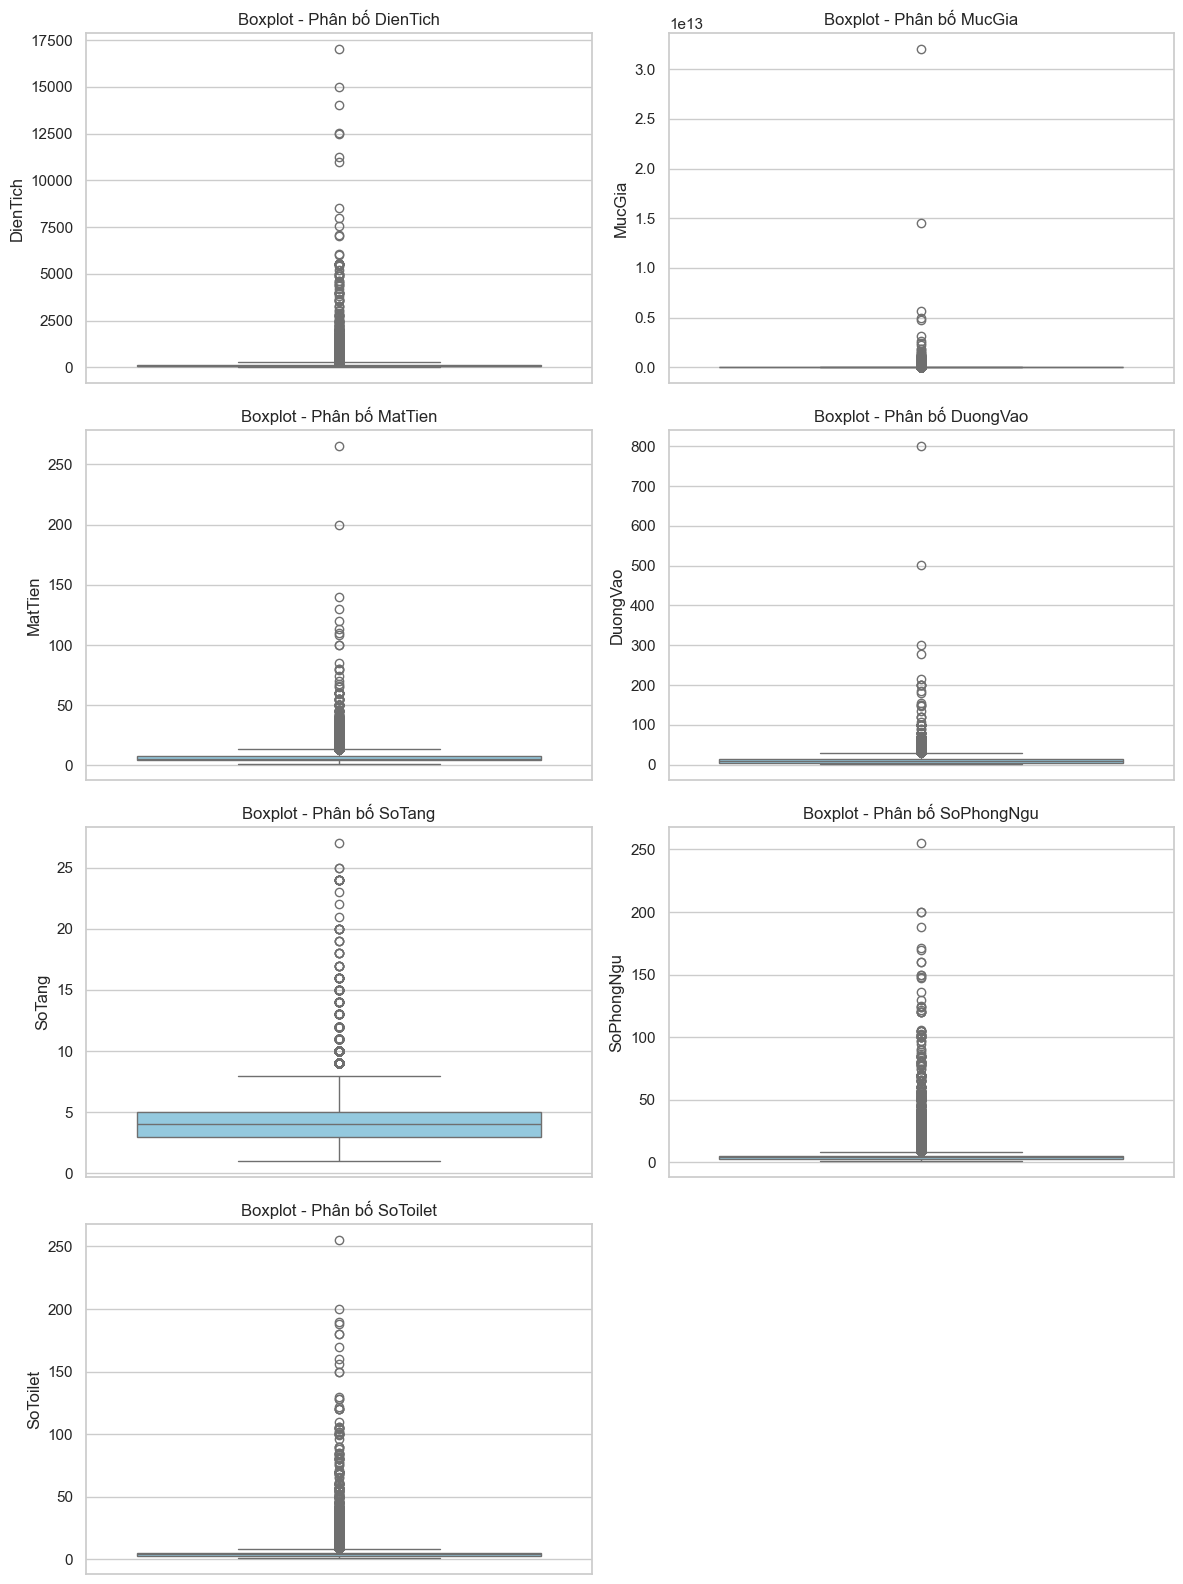

In [135]:
cols = ['DienTich', 'MucGia',
       'MatTien', 'DuongVao', 'SoTang', 'SoPhongNgu',
       'SoToilet']

n_cols = 2  # số biểu đồ mỗi hàng
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=df_raw[col], color="skyblue", ax=axes[i])
    axes[i].set_title(f'Boxplot - Phân bố {col}')
    axes[i].set_ylabel(col)

# Ẩn subplot thừa nếu số cột lẻ
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Từ biểu đồ ta thấy các đặc trưng sau cần kiểm tra các outlier là:
* Diện tích
* Mức giá
* Mặt tiền
* Đường vào
* Số tầng
* Số phòng ngủ
* Số Toilet

In [136]:
# xây dựng hàm để giảm bớt outlier bằng IQR
def remove_outliers_iqr(df, columns):
    cond_keep = pd.Series(True, index=df.index)  # Ban đầu giữ tất cả các hàng

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        lower_bound = max(lower_bound, 0)

        # Kết hợp điều kiện với các cột trước đó
        cond_keep &= df[col].between(lower_bound, upper_bound)

    df_cleaned = df[cond_keep].copy()
    df_outliers = df[~cond_keep].copy()

    print(f"Tổng số dòng ban đầu: {df.shape[0]}")
    print(f"Sau khi loại outlier: {df_cleaned.shape[0]}")
    print(f"Số dòng bị loại: {df_outliers.shape[0]}")

    return df_cleaned, df_outliers

In [137]:
# xử lý outlier cho các cột mục tiêu
cols_to_process = ['MucGia']

# Gọi hàm
df_raw, df_outliers = remove_outliers_iqr(df_raw, cols_to_process)

Tổng số dòng ban đầu: 45925
Sau khi loại outlier: 37125
Số dòng bị loại: 8800


In [138]:
# giới hạn khoảng thấp nhất cho diện tích nhà
rows  = df_raw[df_raw['DienTich'] < 5]
df_raw = df_raw.drop(index = rows.index)

In [139]:
df_raw.describe()

,DienTich,City,District,MucGia,MatTien,PhapLy,DuongVao,HuongNha,SoTang,SoPhongNgu,SoToilet,NoiThat,HuongBanCong,Ward
count,37124.000000,37124.0,37111.0,3.712400e+04,23203.000000,30716.0,18435.000000,9865.0,31821.000000,26548.000000,24325.000000,21193.0,5787.0,36633.0
mean,104.462758,42.249865,429.746275,1.413551e+10,6.238013,1.125895,11.123119,4.947998,3.963232,5.028552,4.884604,2.010098,4.943667,15432.771927
std,138.206448,36.433306,342.724639,1.136774e+10,4.366572,0.588184,12.617200,2.13481,1.671638,5.146589,5.262354,0.785745,2.12696,12160.210762
min,7.000000,1.0,1.0,2.260000e+03,1.000000,0.0,1.000000,1.0,1.000000,1.000000,1.000000,0.0,1.0,1.0
25%,51.000000,1.0,8.0,5.800000e+09,4.000000,1.0,5.000000,3.0,3.000000,3.000000,3.000000,2.0,3.0,340.0
50%,76.000000,48.0,494.0,1.030000e+10,5.000000,1.0,8.000000,5.0,4.000000,4.000000,4.000000,2.0,5.0,20306.0
75%,115.000000,79.0,766.0,1.890000e+10,7.000000,1.0,13.500000,6.0,5.000000,5.000000,5.000000,2.0,6.0,26965.0
max,8534.600000,96.0,968.0,5.320000e+10,265.000000,4.0,800.000000,8.0,24.000000,160.000000,180.000000,3.0,8.0,32098.0


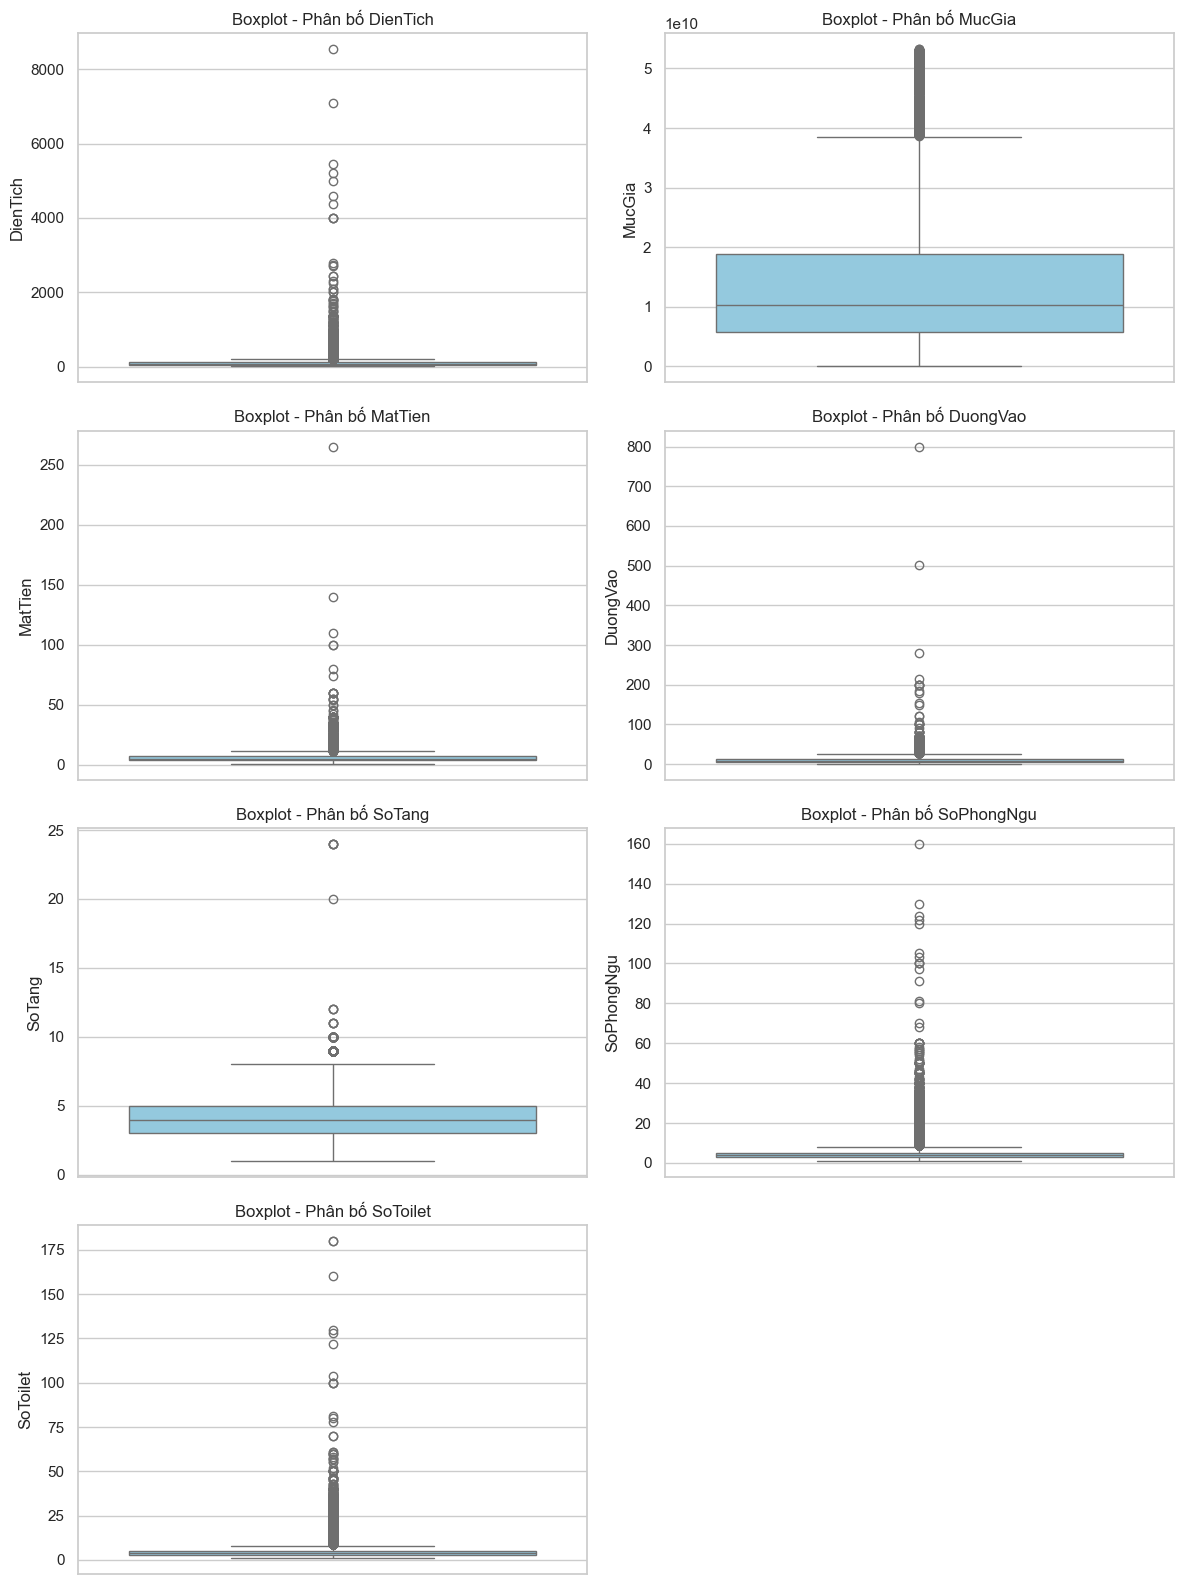

In [140]:
cols = ['DienTich', 'MucGia',
       'MatTien', 'DuongVao', 'SoTang', 'SoPhongNgu',
       'SoToilet']

n_cols = 2  # số biểu đồ mỗi hàng
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=df_raw[col], color="skyblue", ax=axes[i])
    axes[i].set_title(f'Boxplot - Phân bố {col}')
    axes[i].set_ylabel(col)

# Ẩn subplot thừa nếu số cột lẻ
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Nhận xét:
* Đã xử lý được phần lớn outlier của Mức giá.
* Các outlier của các trường còn lại: chủ yếu được giữ lại để tránh hao hụt dữ liệu dẫn đến overfitting khi dự đoán. Và giữ lại các căn nhà cao cấp và các căn dịch vụ thường có Diện tích, mặt tiền,đường vào, số phòng ngủ, số Toilet và số tầng lớn.

## Xử lý dữ liệu Null

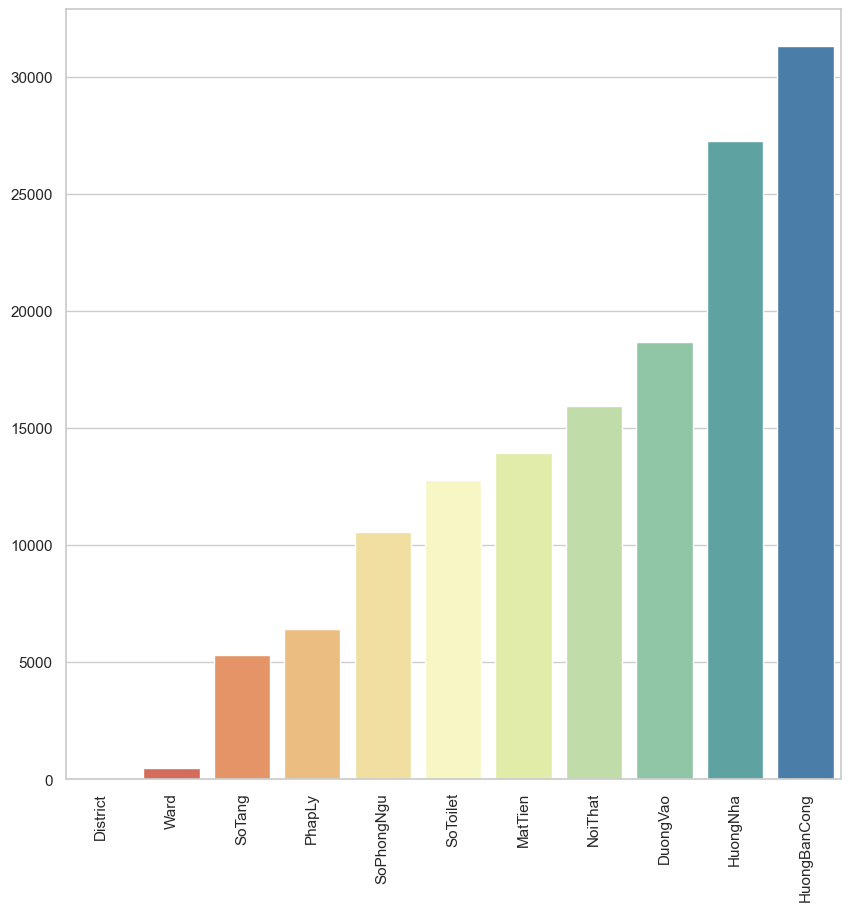

In [141]:
# Kiểm tra xem có bao nhiêu giá trị null
missing = df_raw.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

fig = plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')

# Sử dụng hue để tránh warning và tắt legend
ax = sns.barplot(
    x=missing.index.tolist(),
    y=missing.values,
    hue=missing.index.tolist(),
    palette='Spectral',
    legend=False
)


plt.xticks(rotation=90)
plt.show()

In [142]:
# Xóa cột có nhiều giá trị null nhất
df_raw.drop(columns=['HuongBanCong'], inplace=True)
# Xóa các hàng có giá trị null trong cột quan trọng
df_raw = df_raw.dropna(subset=['City', 'District', 'Ward','MucGia','DienTich'])

In [143]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36633 entries, 0 to 45924
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DienTich    36633 non-null  float64
 1   City        36633 non-null  Int32  
 2   District    36633 non-null  Int32  
 3   MucGia      36633 non-null  float64
 4   MatTien     22905 non-null  float64
 5   PhapLy      30317 non-null  Int8   
 6   DuongVao    18186 non-null  float64
 7   HuongNha    9653 non-null   Int8   
 8   SoTang      31444 non-null  float64
 9   SoPhongNgu  26231 non-null  float64
 10  SoToilet    24024 non-null  float64
 11  NoiThat     20916 non-null  Int8   
 12  Ward        36633 non-null  Int32  
dtypes: Int32(3), Int8(3), float64(7)
memory usage: 3.0 MB


## fill các trường có giá trị non-null nhỏ hơn 3000

In [144]:
# Hàm để sinh giá trị ngẫu nhiên có giới hạn trong khoảng cố định
def truncated_normal(mean, std, lower, upper, size):
    return truncnorm(
        (lower - mean) / std, (upper - mean) / std, loc=mean, scale=std).rvs(size)

# Hàm để điền các giá trị bị thiếu trong một cột số
def fill_missing_with_random(column):
    if column.dtype.kind in 'biufc' or column.dtype == 'O':  # số hoặc object
        non_missing = column.dropna().astype(float)
        if non_missing.empty:
            return column  # Nếu toàn NaN thì bỏ qua

        mean = np.mean(non_missing)
        std = np.std(non_missing)

        # Lấy index của các giá trị NaN
        missing_indices = column[column.isnull()].index

        if column.name == 'HuongNha':
            random_data = truncated_normal(mean, std, 1, 8, len(missing_indices))
        elif column.name == 'NoiThat':
            random_data = truncated_normal(mean, std, 0, 3, len(missing_indices))
        else:
            random_data = np.random.normal(loc=mean, scale=std, size=len(missing_indices))
            random_data = np.abs(random_data)

        # Ép về float trước khi gán
        column = column.astype(float)
        column.loc[missing_indices] = random_data

    return column

def zero_round(value):
    if value < 0.5:
        return 0
    elif value < 1:
        return 1
    else:
        return np.floor(value)
    
def process_column(column, method="default"):
    column = fill_missing_with_random(column)

    if method == "huong":
        column = np.floor(column).astype("Int64")   # từ 1–8
    elif method == "noithat" or method == "phaply":
        column = column.apply(zero_round).astype("Int64")
    else:
        column = column.astype(int)  # cột số khác giữ dạng int
    
    return column

# Áp dụng cho DataFrame
df_raw['HuongNha'] = process_column(df_raw['HuongNha'], method="huong")
df_raw['NoiThat']  = process_column(df_raw['NoiThat'], method="noithat")
df_raw['SoPhongNgu'] = process_column(df_raw['SoPhongNgu'], method="sophongngu")
df_raw['SoToilet'] = process_column(df_raw['SoToilet'], method="sotoilet")

In [145]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36633 entries, 0 to 45924
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DienTich    36633 non-null  float64
 1   City        36633 non-null  Int32  
 2   District    36633 non-null  Int32  
 3   MucGia      36633 non-null  float64
 4   MatTien     22905 non-null  float64
 5   PhapLy      30317 non-null  Int8   
 6   DuongVao    18186 non-null  float64
 7   HuongNha    36633 non-null  Int64  
 8   SoTang      31444 non-null  float64
 9   SoPhongNgu  36633 non-null  int64  
 10  SoToilet    36633 non-null  int64  
 11  NoiThat     36633 non-null  Int64  
 12  Ward        36633 non-null  Int32  
dtypes: Int32(3), Int64(2), Int8(1), float64(5), int64(2)
memory usage: 4.5 MB


Nhận xét:
* xử lý hầu hết giá trị null trong các trường dữ liệu.

Các trường còn null:
* Pháp lý, Số tầng: giá trị null ít nên khi huấn luyện mô hình, lựa chọn mô hình chấp nhận giá trị null thì việc này không ảnh hưởng quá nhiều đến kết quả dự đoán.
* Mặt tiền, Đường vào: hai giá trị này, thực tế ảnh hưởng nhiều đến giá nên nếu fill random sẽ dẫn đến sai lệch mô hình lớn.

In [ ]:
df_raw.to_csv('../../Data/CleanData/house_processed-dataset.csv',index=False)